<a href="https://colab.research.google.com/github/Jennapa-colab/DWDM21/blob/main/Chap_8_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **K-means**

### **Generate Data**

In [1]:
from sklearn.datasets import make_blobs

In [2]:
X, y = make_blobs(n_samples=500, centers=3, n_features=2, random_state=6)

In [3]:
X.shape

(500, 2)

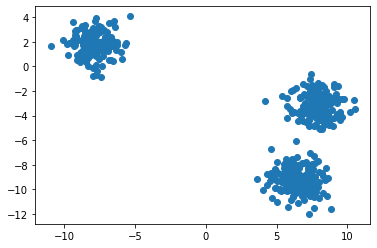

In [4]:
from matplotlib import pyplot as plt
plt.scatter(X[:,0],X[:,1])

### **Clustering**

**import**

In [5]:
from sklearn.cluster import KMeans

**Define**

In [6]:
kmeans = KMeans(n_clusters=2, random_state=6)

**Fit-Predict**

In [7]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=6, tol=0.0001, verbose=0)

In [8]:
y_clust = kmeans.fit_predict(X)

In [9]:
y_clust

array([1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,

**Plot**

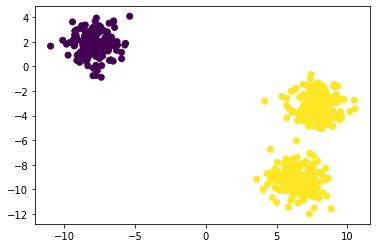

In [10]:
plt.scatter(X[:,0],X[:,1], c=y_clust)

**3 Cluster**

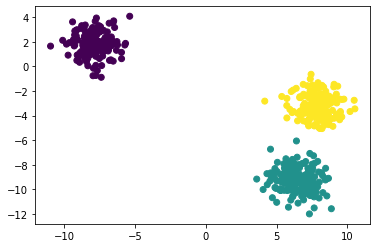

In [11]:
#Define
kmeans = KMeans(n_clusters=3, random_state=6)
#Fit-Predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1], c=y_clust)

**4 Cluster**

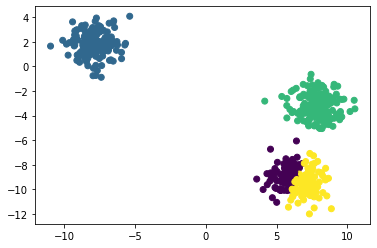

In [12]:
#Define
kmeans = KMeans(n_clusters=4, random_state=6)
#Fit-Predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1], c=y_clust)

**5 Cluster**

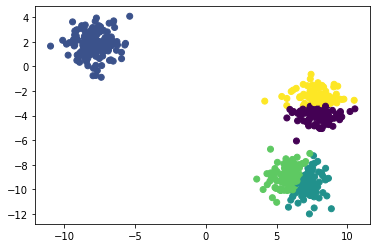

In [13]:
#Define
kmeans = KMeans(n_clusters=5, random_state=14)
#Fit-Predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1], c=y_clust)

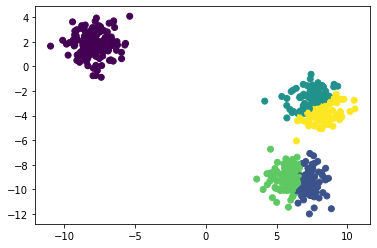

In [14]:
#Define
kmeans = KMeans(n_clusters=5, random_state=6)
#Fit-Predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1], c=y_clust)

## **Example Application (Color Quantization)**

In [24]:
import cv2
import os

In [25]:
img = cv2.imread('/content/CC47F8AD-07A8-43D0-9219-D0C3D405A617.jpeg')

In [26]:
img.shape

(396, 330, 3)

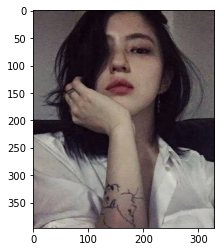

In [27]:
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

### นับจำนวนสี

In [28]:
import numpy as np

In [29]:
np.unique(np.reshape(RGB_img,(RGB_img.shape[0]*RGB_img.shape[1],3)),axis=0).shape #มี 43,285 สี

(20635, 3)

### จัดกลุ่มสีให้เหลือ 16 สี

In [30]:
myquantize = KMeans(n_clusters=16, random_state=6)

แปลงข้อมูลให้อยู่ในรูป row-column

In [31]:
img_row = np.reshape(RGB_img,(RGB_img.shape[0]*RGB_img.shape[1],3))
img_row.shape

(130680, 3)

In [32]:
final_color = myquantize.fit_predict(img_row)

ใช้ centroid เป็นตัวแทนของสี

In [33]:
centroid = myquantize.cluster_centers_

In [34]:
centroid

array([[ 19.01665401,   9.36583144,  18.71045305],
       [143.97140575, 139.99073482, 138.88530351],
       [ 97.02173721,  82.9699567 ,  83.32676504],
       [127.4646432 , 100.98159509,  93.62641266],
       [174.48455996, 173.93412249, 169.22709727],
       [ 50.72558244,  36.94758065,  42.27710573],
       [142.96641343, 121.24656804, 111.23137412],
       [116.28984869, 111.67841927, 113.26560893],
       [ 70.30696508,  54.75979163,  57.26046691],
       [ 28.76288095,  19.5996492 ,  29.13801798],
       [173.24655918, 156.24380653, 138.9913488 ],
       [159.51113014, 138.04760274, 123.14092466],
       [190.88114588, 190.91284031, 185.5318976 ],
       [104.10181242,  95.78419332,  97.31811429],
       [160.34402566, 158.2539428 , 154.30116725],
       [ 85.757526  ,  70.41477833,  71.21488779]])

แทนสีคืนลงไป

In [35]:
new_img = np.zeros(RGB_img.shape)
for i in range(RGB_img.shape[0]):
    for j in range(RGB_img.shape[1]):
      new_img[i,j,:] = centroid[myquantize.predict([RGB_img[i,j,:]]),:]

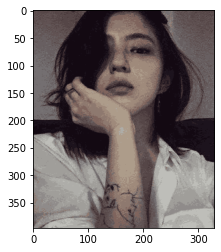

In [36]:
plt.imshow(new_img/255)

In [37]:
plt.imsave('img.jpg',new_img/255)

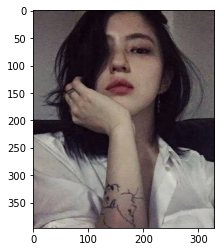

In [38]:
plt.imshow(RGB_img)

จัดกลุ่มสีให้เหลือ 8 สี

In [39]:
myquantize2 = KMeans(n_clusters=8, random_state=6)

แปลงข้อมูลให้อยู่ในรูป row-column

In [40]:
img_row2 = np.reshape(RGB_img,(RGB_img.shape[0]*RGB_img.shape[1],3))
img_row2.shape

(130680, 3)

In [41]:
final_color = myquantize2.fit_predict(img_row)

In [42]:
new_img2 = np.zeros(RGB_img.shape)
for i in range(RGB_img.shape[0]):
    for j in range(RGB_img.shape[1]):
      new_img2[i,j,:] = centroid[myquantize2.predict([RGB_img[i,j,:]]),:]

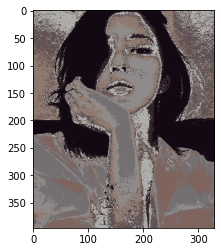

In [43]:
plt.imshow(new_img2/255)

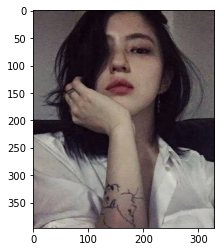

In [44]:
plt.imshow(RGB_img)